<br>
<font color='purple' size=7><b>Google Play Store Apps - Data Analysis</b></font>

<img src=https://www.cyclonis.com/images/2020/03/googleplay.jpg style="height:200px">
Source: CYCLONIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Information
In this project we will research the "Google Play Store Apps" dataset. <br>
This dataset contains information about applications listed in Android's application store- Google Play Store, such as the size of the app, number of reviews, number of installs, etc. <br>
Researching this dataset could help developers understand the Android market and improve their apps accordingly.<br>
In this analysis we assume that this dataset is a representative sample of the google play store's available apps.

In [2]:
df_googleplaystore = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('user_reviews.csv')
# some information about the dataset
display(df_googleplaystore.head())
display(df_googleplaystore.info())
print("Shape: \t" , df_googleplaystore.shape)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

Shape: 	 (10841, 13)


Our dataset includes 10841 records and has 13 features. <br>
For each app there is information about: 
* App - Application name - **Categorial**
* Category - Category the app belongs to - **Categorial**
* Rating - Overall user rating of the app - **Numeric**
* Reviews - Number of user reviews for the app - **Categorial**
* Size - Size of the app - **Categorial**
* Installs - Number of user installs for the app - **Categorial**
* Type- Whether the app is free or paid - **Categorial**
* Price - Price of the app - **Categorial**
* Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult - **Categorial**
* Genres - An app can belong to multiple genres (apart from its main category) - **Categorial**
* Last Updated - Date when the app was last updated on Play Store - **Categorial**
* Current Ver - Current version of the app available on Play Store - **Categorial**
* Android Ver - Min required Android version - **Categorial**

The categorial variables: Installs, Size, Reviews and Price are only categorial in memory, but actually represent numeric variables. <br>
The categorial variables: Last Updated are only categorial in memory, but actually represent date. 

# Cleaning the data

## Droping duplicates:

In [3]:
df_googleplaystore.sort_values(by=['App','Reviews']) # sort by name of app and then by reviews in descending order
apps = df_googleplaystore['App'].value_counts() # creating series of apps and number of repetitions
filter = apps > 1 # filtering only apps that are duplicated
duplicated_apps = apps[filter]
duplicated_apps_precentage = duplicated_apps.value_counts().sum()/apps.value_counts().sum() # calculating the percentage of the duplicated apps out of the total number of apps
duplicated_apps_precentage # the percent of the duplicated apps

0.08260869565217391

In the data cleaning process we discovered that there is a number of duplicated rows (applications). for each app, the duplicated rows varies only by the number of reviews.
we faced two options:
1. Removing all duplicated rows - <br>
Advantage: The data is clean and there is no chance for measurement bias (the chance of deleting the wrong row). <br>
Disadvantage: Loss of 8% of the applications. Deleting about 1,000 applications from the data that could affect the classifiers of our research. 
In the case that the data that is duplicated is not random we can unwantedly cause the data to be unrepresentative.<br>
2. In each duplicated applicatin keeping one of the rows (the row that contain the maximum number of reviews because it is probably the most recent) and removing all of the rest - <br>
Advantage: Not losing 8% of the applications. making sure that the data is still representative because each app can affect the classifiers of our research. <br>
Disadvantage: Unwantedly deleting the wrong row, causing measurement bias.

We chose option number 2. We believe the advantages overcome the disadvantages because in this case a random measurement bias is less critical than an unrepresentative data.

In [4]:
# dropping the duplicates
df_googleplaystore.drop_duplicates(subset='App',keep='first',inplace=True, ignore_index=True)

## Droping/Replacing unwanted data:

In [5]:
filterrelevantrow = df_googleplaystore['Installs'] == 'Free'
display(df_googleplaystore[filterrelevantrow])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As shown above, there is one row that all of it's values are shifted left which can affect our research and cause a measurement bias. We decided to drop this row because of that reason.

In [6]:
# dropping the defected row
filterfree = df_googleplaystore['Installs'] != 'Free'
df_googleplaystore = df_googleplaystore[filterfree]

In [7]:
# checking NA values
display(df_googleplaystore.isna().sum())
sum_na = df_googleplaystore.isna().sum().sum()
print(f"Total Number of NA values: {sum_na}")

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Total Number of NA values: 1474


As shown, there are 1474 rows with NA values. In 'Rating' column, there are 1463 NA values, therefore we will replace the NA values with the median value in order to have a minimum impact on the data and our clasifier. <br> 
The rest of the rows that contain NA values are negligible so we will use dropna.

In [8]:
print("The new shape of the dataset: \t" , df_googleplaystore.shape)

The new shape of the dataset: 	 (9659, 13)


#### Rating

As we discovered, in the 'Rating' column, there are 1463 rows which contains missing values. <br>
In the dataset there are 9659 rows at this moment. Since 1463 out of 9659 rows is more than 15% of the data, deleting these rows can cause a critical impact on the data, making it unrepresentative. <br>
We choose to replace this value with the median value, which help us to make sure there is a minimum impact on the classification process in the research. <br>

In [9]:
median_rating = df_googleplaystore['Rating'].median()
wanted_rows = df_googleplaystore['Rating'].loc[df_googleplaystore['Rating'].isna()].index.tolist()
df_googleplaystore.loc[wanted_rows, 'Rating'] = pd.DataFrame(df_googleplaystore.loc[wanted_rows, 'Rating'].apply(lambda x: median_rating)) # changing to the median value
df_googleplaystore['Rating'].isna().sum() # the NA values in Rating column after the change

0

#### Content Rating

In [10]:
df_googleplaystore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

As shown, there is a unique value - 'Unrated'. We will measure the impact that it will cause on the data while dropping the rows that contain that value.

In [11]:
df_googleplaystore.groupby('Content Rating').size()

Content Rating
Adults only 18+       3
Everyone           7903
Everyone 10+        322
Mature 17+          393
Teen               1036
Unrated               2
dtype: int64

As shown, there are 2 Unrated values in the 'Content Rating' column. This number of rows is negligible, therefore we choose to drop these rows.

In [12]:
wanted_rows = df_googleplaystore['Content Rating'].loc[df_googleplaystore['Content Rating'].str.contains('Unrated')].index.tolist()
df_googleplaystore.drop(wanted_rows , inplace=True)

## Dropping NA:

In [13]:
df_googleplaystore.isna().sum().sum() # displaying the number of NA values before the drop

11

In [14]:
df_googleplaystore.dropna(inplace=True)
df_googleplaystore.isna().sum().sum() # number of NA values after the drop

0

## Changing categorial to numeric:

#### Installs

In [15]:
df_googleplaystore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In the 'Installs' column there are values that contain the signs '+' and ','. <br>
We will replace these signs in order to convert the column to be numeric.

In [16]:
df_googleplaystore['Installs'] = df_googleplaystore['Installs'].apply(lambda x: x.strip("+"))
df_googleplaystore['Installs'] = df_googleplaystore['Installs'].apply(lambda x: x.replace(",", ""))
df_googleplaystore['Installs'] = pd.to_numeric(df_googleplaystore['Installs'])

#### Size

In [17]:
df_googleplaystore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As shown above, the only unique value that does not represent a number is 'Varies with device'. <br>
Furthermore, In this column there are values that contain the signs 'k' and 'M'. <br>
We will replace these signs in order to convert the column to be numeric.

In [18]:
print("The new shape of the dataset: \t" , df_googleplaystore.shape)

The new shape of the dataset: 	 (9646, 13)


In [19]:
filtervaries = df_googleplaystore['Size'] == 'Varies with device'
df_googleplaystore[filtervaries].shape[0]

1226

The 'Varies with device' value apears in 1226 rows. <br>
The number of rows in the dataset in this moment is 9646. Since 1226 out of 9646 rows is more than 12% of the data, deleting these rows can cause a critical impact on the data, making it unrepresentative. <br>
We will change the 'Varies with device' value to be the median value in order to cause a minimum impact on the data and the clasifier. <br>
Also, we want to make an even unit of measure, therfore we will convert the Kbytes to Mbytes by dropping the 'k' and 'M' and dividing by 1024.

In [20]:
# changing the value -  at first to '-1' in order to convert to numeric so we can calculate the median
df_googleplaystore['Size'] = df_googleplaystore['Size'].apply(lambda x: x.replace("Varies with device", "-1"))

In [21]:
wanted_rows = df_googleplaystore['Size'].loc[df_googleplaystore['Size'].str.contains('k')].index.tolist()
df_googleplaystore.loc[wanted_rows, 'Size'] = pd.DataFrame(df_googleplaystore.loc[wanted_rows, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df_googleplaystore['Size'] = df_googleplaystore['Size'].apply(lambda x: x.strip("M")) # dropping 'M'
df_googleplaystore['Size'] = pd.to_numeric(df_googleplaystore['Size']) # convert to numeric

In [22]:
wanted_rows = df_googleplaystore['Size'].loc[df_googleplaystore['Size'] != (-1)].index.tolist()
median = df_googleplaystore.loc[wanted_rows, 'Size'].median() # calculating the median

In [23]:
wanted_rows = df_googleplaystore['Size'].loc[df_googleplaystore['Size'] == (-1)].index.tolist()
df_googleplaystore.loc[wanted_rows, 'Size'] = median # changing to the median value

#### Reviews

In [24]:
df_googleplaystore['Reviews'] = pd.to_numeric(df_googleplaystore['Reviews']) # convert to numeric

#### Price

In [25]:
df_googleplaystore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

As shown, the prices in the column is with '$' sign. We will drop it.

In [26]:
df_googleplaystore['Price'] = df_googleplaystore['Price'].apply(lambda x: x.strip('$'))
df_googleplaystore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [27]:
df_googleplaystore['Price'] = pd.to_numeric(df_googleplaystore['Price']) # convert to numeric

## Editing the data

#### Last Updated

As said before, the 'Last Updated' column is only categorial in memory, but actually represent date. <br>
We will convert it.

In [28]:
df_googleplaystore['Last Updated'] = pd.to_datetime(df_googleplaystore['Last Updated']) # converting from string to date
df_googleplaystore['Last Updated'] = df_googleplaystore['Last Updated'].apply(lambda x: x.value)

#### Category

In [29]:
df_googleplaystore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

As shown, the values contain '_' sign so we will replace it with spaces and convert to lowercase for convenience.

In [30]:
# replacing underlines with spaces and converting to lowercase 
df_googleplaystore['Category'] = df_googleplaystore['Category'].apply(lambda x: x.replace("_", " ")).str.lower() 

#### Genres

As we mentioned above, an app can belong to multiple genres (apart from its main category). <br>
We discovered that most of the apps belong to a single genre while only a few belong to, besides from it's main category, other categories. <br>
We choose to convert the 'Genres' column to contain the number of categories which the app belongs to. <br>
We choose this method because most of the apps does not have secondary categories, therefore we believe that the number of catrgories which the app belongs to could have a more significant meaning than the name of the secondary categories.

In [31]:
# replacing '&' with 'and' and converting to lowercase 
df_googleplaystore['Number of Categories'] = df_googleplaystore['Genres'].apply(lambda x: x.replace("&", "and")).str.lower()
# converting to list and adding a temporary column
df_googleplaystore['Number of Categories'] = df_googleplaystore['Number of Categories'].apply(lambda x: x.split(";"))
df_googleplaystore['Genres0'] = df_googleplaystore['Number of Categories'].apply(lambda x: x[0])
# changing the 'Genres' column to contain the total number of categories 
wanted_rows = (df_googleplaystore['Genres0'] == df_googleplaystore['Category'])
df_googleplaystore.loc[wanted_rows, 'Number of Categories'] = pd.DataFrame(df_googleplaystore.loc[wanted_rows, 'Number of Categories'].apply(lambda x: len(x)))
wanted_rows = (df_googleplaystore['Genres0'] != df_googleplaystore['Category'])
df_googleplaystore.loc[wanted_rows, 'Number of Categories'] = pd.DataFrame(df_googleplaystore.loc[wanted_rows, 'Number of Categories'].apply(lambda x: (len(x)+1)))
# deleting the temporary column
df_googleplaystore.drop(columns='Genres0', inplace=True)
# converting the new column from categorial to numeric
df_googleplaystore['Number of Categories'] = pd.to_numeric(df_googleplaystore['Number of Categories'])
df_googleplaystore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Number of Categories
9655,Sya9a Maroc - FR,family,4.5,38,53.0,5000,Free,0.0,Everyone,Education,1500940800000000000,1.48,4.1 and up,2
9656,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100,Free,0.0,Everyone,Education,1530835200000000000,1.0,4.1 and up,2
9657,Parkinson Exercices FR,medical,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,1484870400000000000,1.0,2.2 and up,1
9658,The SCP Foundation DB fr nn5n,books and reference,4.5,114,12.0,1000,Free,0.0,Mature 17+,Books & Reference,1421625600000000000,Varies with device,Varies with device,1
9659,iHoroscope - 2018 Daily Horoscope & Astrology,lifestyle,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,1532476800000000000,Varies with device,Varies with device,1


For example, notice that in row 9656 the main category is 'family' while the genre is 'Education', which means this app belong to 2 categories, therefore in the 'Number Of Categories' column the value is 2. <br>
Another example is in row 9658. This app's main category is 'books and reference' and the genre is 'Books & Reference', which is the same category, therefore in the 'Number Of Categories' column the value is 1.

In [32]:
df_googleplaystore['Number of Categories'].value_counts()

1    6642
2    2666
3     338
Name: Number of Categories, dtype: int64

As shown and said before, most of the apps belong to a single category.

## Final Information

In [33]:
display(df_googleplaystore.describe()) # describes only numerical features
display(df_googleplaystore.describe(include=['O'])) # describes only categorial features
display(df_googleplaystore.info())
print("Shape: \t" , df_googleplaystore.shape)

,Rating,Reviews,Size,Installs,Price,Last Updated,Number of Categories
count,9646.000000,9.646000e+03,9646.000000,9.646000e+03,9646.000000,9.646000e+03,9646.000000
mean,4.192463,2.168818e+05,19.347508,7.787820e+06,1.100421,1.509438e+18,1.346465
std,0.496601,1.832536e+06,20.591579,5.379376e+07,16.863467,3.507253e+16,0.544554
min,1.000000,0.000000e+00,0.008000,0.000000e+00,0.000000,1.274400e+18,1.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000,1.502150e+18,1.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000,1.525478e+18,1.000000
75%,4.500000,2.945775e+04,25.000000,1.000000e+06,0.000000,1.531786e+18,2.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,1.533686e+18,3.000000


,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,9646,9646,9646,9646,9646,9646,9646
unique,9646,33,2,5,118,2817,33
top,CF Calculator,family,Free,Everyone,Tools,Varies with device,4.1 and up
freq,1,1827,8893,7893,823,1054,2202


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646 entries, 0 to 9659
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   9646 non-null   object 
 1   Category              9646 non-null   object 
 2   Rating                9646 non-null   float64
 3   Reviews               9646 non-null   int64  
 4   Size                  9646 non-null   float64
 5   Installs              9646 non-null   int64  
 6   Type                  9646 non-null   object 
 7   Price                 9646 non-null   float64
 8   Content Rating        9646 non-null   object 
 9   Genres                9646 non-null   object 
 10  Last Updated          9646 non-null   int64  
 11  Current Ver           9646 non-null   object 
 12  Android Ver           9646 non-null   object 
 13  Number of Categories  9646 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.4+ MB


None

Shape: 	 (9646, 14)


After the changes, our dataset includes 9646 records and has 14 features. <br>
The new types of the columns are:
* App - **Categorial**
* Category - **Categorial**
* Rating - **Numeric**
* Reviews - **Numeric**
* Size - **Numeric**
* Installs - **Numeric**
* Type- **Categorial**
* Price - **Numeric**
* Content Rating - **Categorial**
* Genres - **Categorial**
* Last Updated - **Numeric-datetime**
* Current Ver - **Categorial**
* Android Ver - **Categorial**
* Number of Categories - **Numeric**

# Exploratory data analysis
## distribution of variables

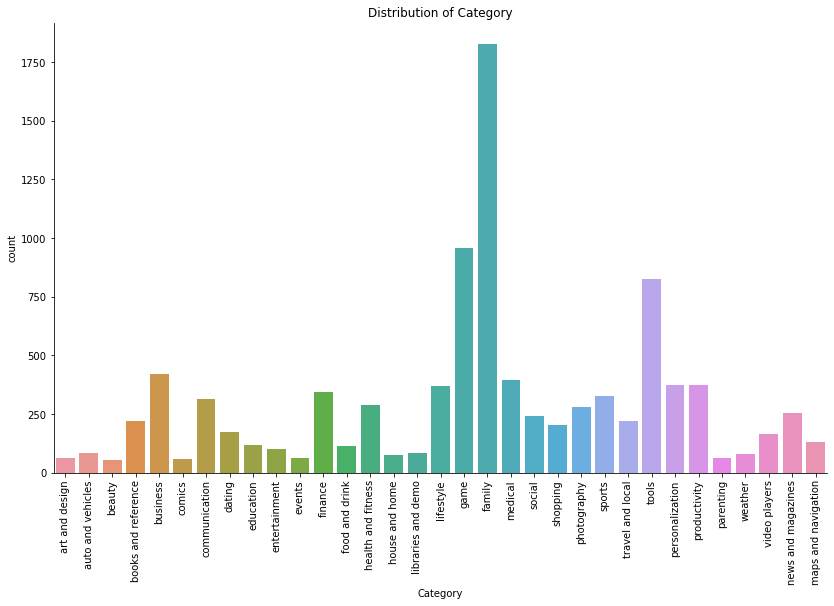

In [34]:
# Distribution of 'Category' column
ax = sns.catplot(data = df_googleplaystore, x = 'Category', kind = 'count')
ax.set(title = 'Distribution of Category')
ax.fig.set_size_inches(15,7)
ax.set_xticklabels(rotation=90)
plt.show()

From the graph, we can observe that 'family' is the most common category and the second is 'game'.

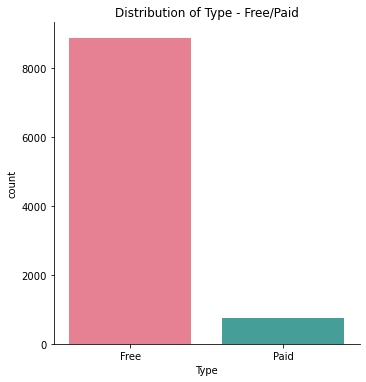

In [35]:
# Distribution of 'Type' column
ax = sns.catplot(data = df_googleplaystore, x = 'Type', kind = 'count' , palette='husl')
ax.set(title = 'Distribution of Type - Free/Paid')
ax.fig.set_size_inches(5,5)
plt.show()

From the graph, we can observe that most of the apps are free (with a big difference).

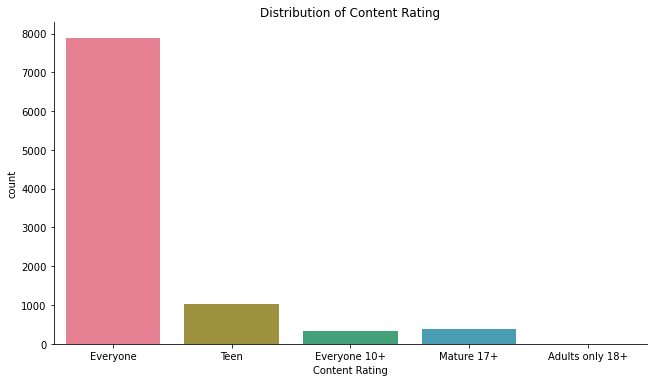

In [36]:
# Distribution of 'Content Rating' column
ax = sns.catplot(data = df_googleplaystore, x = 'Content Rating', kind = 'count', palette='husl')
ax.set(title = 'Distribution of Content Rating')
ax.fig.set_size_inches(10,5)
plt.show()

From the graph, we can observe that the most common Content Rating in which the apps are targeted for is 'Everyone' and the rarest is 'Adults only 18+'

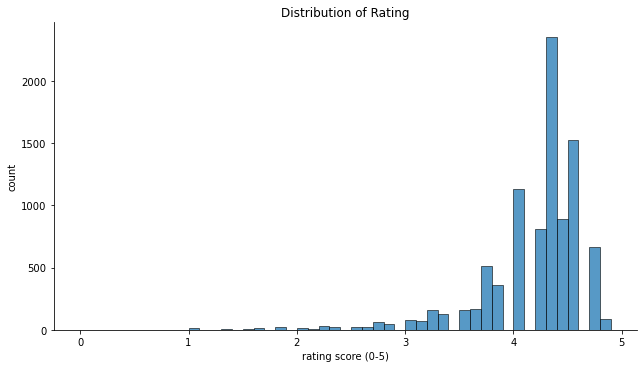

In [37]:
# Distribution of 'Rating' column
ax = sns.displot(df_googleplaystore, x='Rating' ,bins=np.arange(0,5,0.1))
ax.fig.set_size_inches(10,5)
ax.set(xlabel='rating score (0-5)', ylabel='count', title='Distribution of Rating')
plt.show()

From the graph, we can observe that most of the apps overall user rating is between 4 and 5.

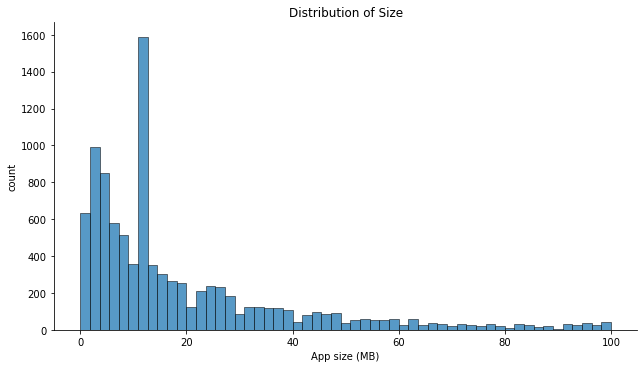

In [38]:
# Distribution of 'Size' column
ax = sns.displot(df_googleplaystore, x='Size' )#bins=np.arange(0,5,0.1))
ax.fig.set_size_inches(10,5)
ax.set(xlabel='App size (MB)', ylabel='count', title='Distribution of Size')
plt.show()

From the graph, we can observe that the majority of the apps' size is between 0 and 20 MB. <br>
As we remember we predicted that there will be a lot of apps with 16MB size, because we changed the 'Varies with device' value to the median which is '16'.

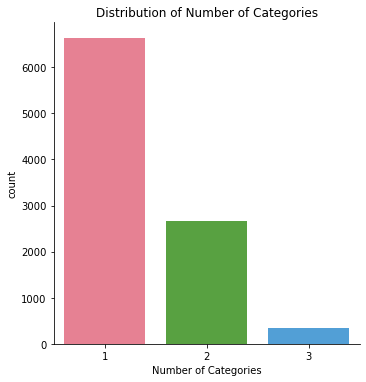

In [39]:
# Distribution of 'Number of Categories' column
ax = sns.catplot(data = df_googleplaystore, x = 'Number of Categories', kind = 'count' , palette='husl')
ax.set(title = 'Distribution of Number of Categories')
ax.fig.set_size_inches(5,5)
plt.show()

From the graph, we can observe that most of the apps belong to one category.

## Illustrating bivariate relationships

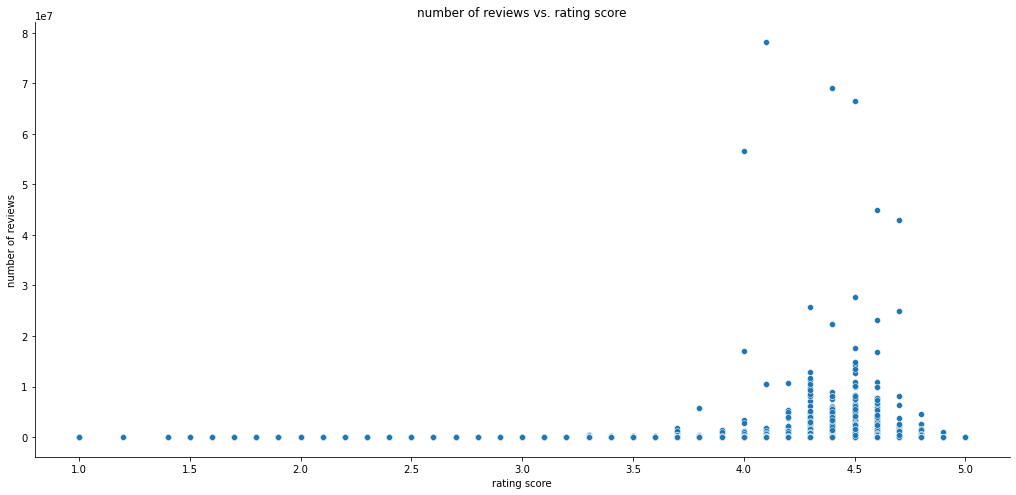

In [40]:
# number of reviews vs. rating score
ax = sns.relplot(x='Rating', y='Reviews', data=df_googleplaystore)#, height=7, aspect=4)
ax.fig.set_size_inches(15,7)
ax.set(xlabel='rating score', ylabel='number of reviews', title='number of reviews vs. rating score');

From the graph, we can observe that the number of reviews and the rating isn't linear correlated because there is no visible linear trend. <br> Though we can observe that when the rating score is around 4.5 the number of reviews is relatively higher.

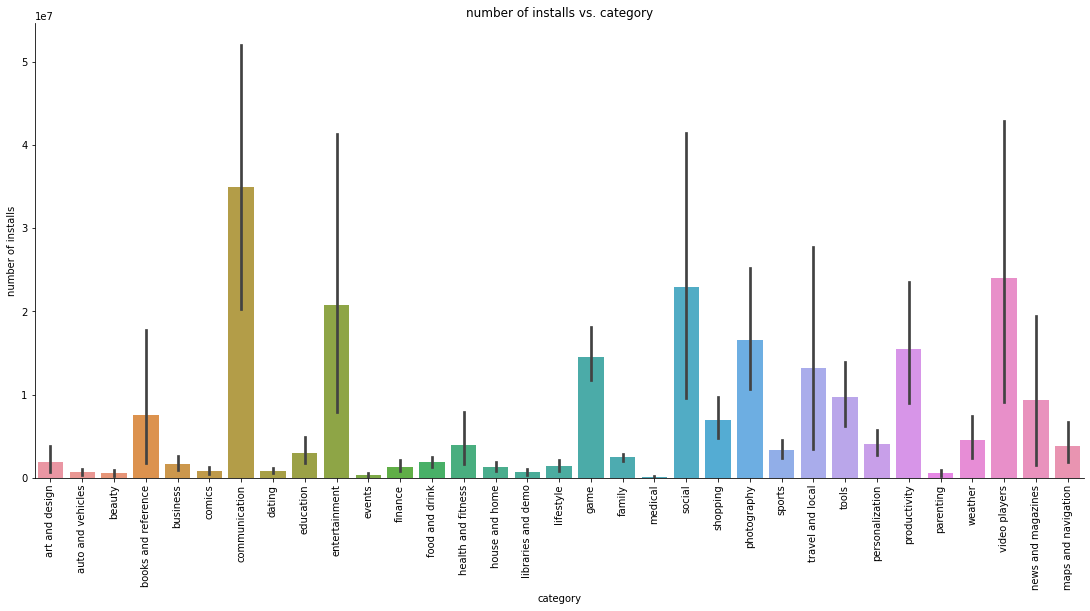

In [41]:
# Category vs. Installs
ax = sns.catplot(kind='bar', x='Category', y='Installs', data=df_googleplaystore, height=7, aspect=4)
ax.fig.set_size_inches(15,7)
ax.set_xticklabels(rotation=90)
ax.set(xlabel='category', ylabel='number of installs', title='number of installs vs. category');

From the graph, we can observe that the apps with the highest number of installs are categorized as communication apps, the other apps with the next highest number of installs are catogorized: 'video players', 'social', 'entertainment'.<br>
Furthermore, we can observe that there is no correlation between the two variables.

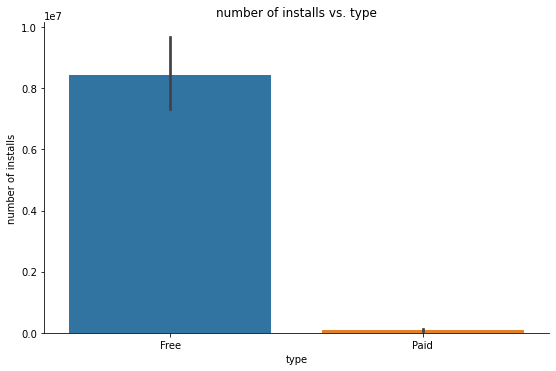

In [42]:
# Type vs. Installs
ax = sns.catplot(kind='bar', x='Type', y='Installs', data=df_googleplaystore)
ax.fig.set_size_inches(8,5)
ax.set(xlabel='type', ylabel='number of installs', title='number of installs vs. type');

As we can observe from the graph, the apps that are free has a significant higher number of installs.Therefore we can conclude that there is a positive correlation between the 'Type' (Free) and the 'Installs' variables.

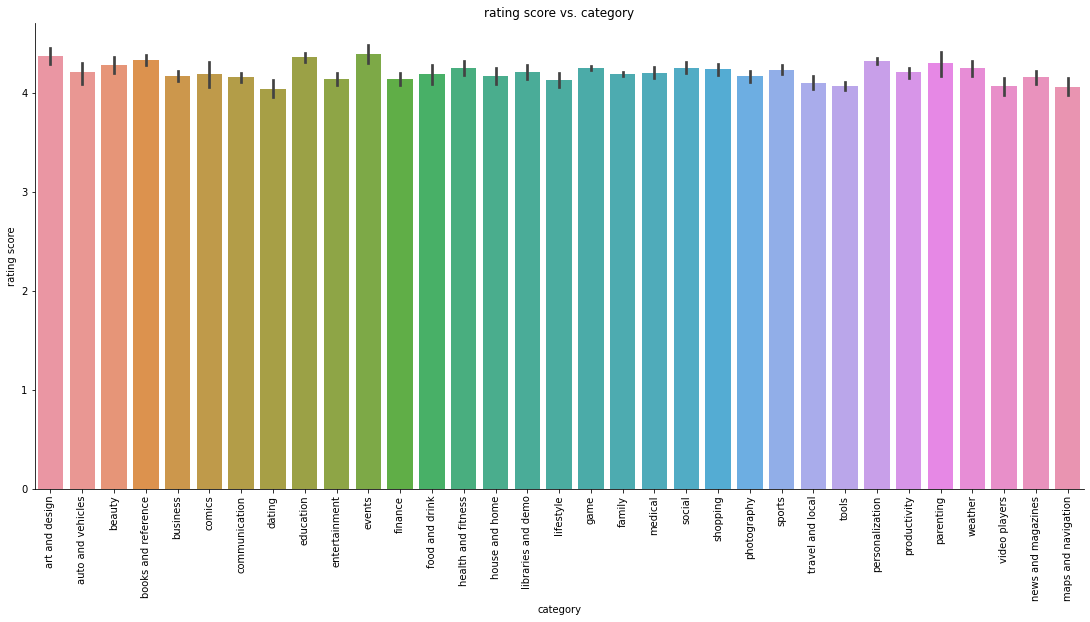

In [43]:
# Category vs. Rating
ax = sns.catplot(kind='bar', x='Category', y='Rating', data=df_googleplaystore, height=7, aspect=4)
ax.fig.set_size_inches(15,7)
ax.set_xticklabels(rotation=90)
ax.set(xlabel='category', ylabel='rating score', title='rating score vs. category');

As shown in the graph, all of the categories total rating score is higher than 4.<br>
There is no correlation between the two variables. 

# Estimation and hypothesis testing

We are classifying an app potential success rate.<br>
Our classifier can help a start up company measure the success of it's app prior to releasing it, using the variables - 'Category', 'Size', 'Type', 'Price', 'Content Rating', 'Last Updated', 'Number of Categories', thus helping the company improve the app.


**Creating new column - Success Rate**, which is calculated by: $$ Success Rate = (Scaled Reviews*Rating) + (Scaled Installes) $$<br> 
A success of an application is measured by it's Revenue. There are many factors that can affect it. In our data set, we decided that the features that affect the revenue the most are- Installs, Rating. Therefore, our calculation of the success rate is taking in account both the number of installs and the rating score. 
If the number of reviews is relatively low the standard deviation is large and the overall rating of the app is not accurate, therefore we decided to normalize the number of reviews to a scale of 0 to 1, and multiply the result with the rating value, thus giving value to the level of the accuracy of the rating score. In adddition we chose to normalize the number of installs to a rang of 0 to 5, and add it to the success rate.


### Dividing the data into 4 groups by the level of success

**Scaling the data**
In the process of scaling using Sklearn scaler we noticed that for equal values in the 'Installs' column the normalized values of the installs are not equal, therefore we created a simple function using the formula we learned in the lecture.
below (in comment) are the code lines we originaly used to normalize the data.

In [44]:
# normalscaler = MinMaxScaler()
# df_googleplaystore['Scaled Reviews'] = pd.DataFrame(normalscaler.fit_transform(pd.DataFrame(df_googleplaystore['Reviews'])),columns=['Reviews'])
# scaler_0_5 = MinMaxScaler(feature_range=(0,5))
# df_googleplaystore['Scaled Installs'] = pd.DataFrame(scaler_0_5.fit_transform(pd.DataFrame(df_googleplaystore['Installs'])),columns=['Installs'])

creating a scaling function to normalize the wanted feature with the formula: $\dfrac{x_i - min(X)}{max(X) - min(X)}$ 

In [45]:
def scale(data_set, column, scale_range=1):
    column_name = 'Scaled ' + column
    max_val = data_set[column].max()
    min_val = data_set[column].min()
    data_set[column_name] = data_set[column].apply(lambda x: scale_range*(x-min_val)/(max_val-min_val))
# scaling the Installs column to 0 to 5 range
scale(df_googleplaystore,'Installs',5)
# scaling the Installs column to 0 to 5 range
scale(df_googleplaystore,'Reviews')

In [46]:
# applying the new success rate
df_googleplaystore['Success Rate'] = df_googleplaystore['Scaled Reviews']*df_googleplaystore['Rating']+df_googleplaystore['Scaled Installs']

**We will define the null hypotesis and the alternative hypotesis:**<br>
H0 = The median success rate of an app categorized as 'game' is equal to the median success rate of the rest of the apps.<br>
H1 = The median success rate of an app categorized as 'game' is higher than the median success rate of the rest of the apps.

In [47]:
def diff_of_medians(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    medians = grpby_var[column_name].median()
    return medians[1] - medians[0]

def bootstrap_median_difference(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_median_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True)
        resampled_median_diff = diff_of_medians(bootstrap_sample, column_name, grouping_var)
        bstrap_median_diffs[i] = resampled_median_diff
    
    return bstrap_median_diffs

In [48]:
# adding a feature: is game?
wanted_rows = df_googleplaystore['Category'].loc[df_googleplaystore['Category'] == 'game'].index.tolist()
game_df = df_googleplaystore
game_df['game?'] = 0
game_df.loc[wanted_rows, 'game?'] = pd.DataFrame(game_df.loc[wanted_rows, 'game?'].apply(lambda x: 1))

bstrap_diffs = bootstrap_median_difference(game_df, 'Success Rate', 'game?',  game_df.shape[0])

lower value:  0.005491243035641024
upper value:  0.006890576716184202


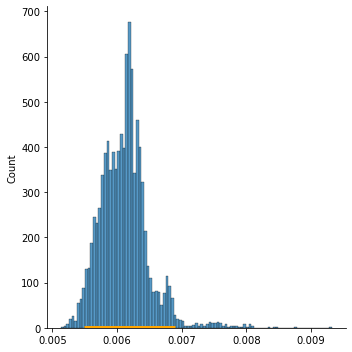

In [49]:
left_end = np.percentile(bstrap_diffs, 2.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 97.5, interpolation='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

# visualize results
facetgrid_obj = sns.displot(bstrap_diffs);
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5);  # lw controls thickness of line

As we can see in the graph, 0 is not in the confidence interval, therefore we can disproof the null hypothesis.<br>
The test statistic in this bootstrap evaluation is the difference between the median of the Success rate of all the apps categorized as game, and the median of the rest of the apps. <br>
The null hypothesis claims that there is no difference between the mentioned medoians, therefore if 0 is not in the confidence interval we can disproof the null hypothesis.

Now we will drop the temporary 'game?' column

In [50]:
df_googleplaystore.drop(columns='game?',inplace=True)

# Prediction or Clustering

**Dividing the data** into 2 groups: 0-75% , 75%-100%

In [51]:
precentile_75 = df_googleplaystore.quantile(q = 0.75, interpolation='higher')[8] # finding the 75 percentile value
df_googleplaystore['label'] = 0 # creating the 'label' column
wanted_rows = df_googleplaystore['Success Rate'].loc[df_googleplaystore['Success Rate'] >= precentile_75].index.tolist() 
df_googleplaystore.loc[wanted_rows, 'label'] = pd.DataFrame(df_googleplaystore.loc[wanted_rows, 'label'].apply(lambda x: 1)) # replacing 0 with 1 for all higher than 75% value

### Dropping unrelevant columns for classification

In [52]:
df_googleplaystore.groupby('Android Ver').get_group('Varies with device').shape[0] # number of 'Varies with device' in 'Android Ver' column

989

We chose to drop the following columns: 'App','Success Rate','Rating','Reviews','Installs','Genres','Current Ver','Scaled Reviews','Scaled Installs','Android Ver'.
* App - the name of an aplication is not relevant to the classification process
* Success Rate - this column was a tool for dividing the data
* Rating, Reviews, Installs - the Rating, Installs and Reviews columns are calculated in the success rate column, therefore considering them in the classification process will cause data leakage
* Genres - as we explained before, we chose to use the number of genres instead
* Scaled reviews, Scaled Installs - were used in the process of calculating the Success Rate therefore are not needed
* Current Ver - this value is the version number of the app, it is an internal feature which is not relevant to the classification process
* Android Ver - this value is the range of the android version that each app is supported in. We decided to drop this column because there are 989 apps that does not have a specified version range- "Varies with Device".<br>
It is possible to replace those missing values with the mode. However, there are 33 possible values, therefore if it is not the correct value we are risking in creating a measurement bias. Furthermore, deleting the rows that their values are not specified can cause a selection bias and making the data unrepresentative data sample. Therefore in our opinion the best choice is to not consider this value in the process of classificaion.

In [53]:
#cleaning the df for classification
clean_df = df_googleplaystore.drop(columns = ['App','Success Rate','Rating','Reviews','Installs','Genres','Current Ver','Scaled Reviews','Scaled Installs','Android Ver'])
clean_df.head()

,Category,Size,Type,Price,Content Rating,Last Updated,Number of Categories,label
0,art and design,19.0,Free,0.0,Everyone,1515283200000000000,1,0
1,art and design,14.0,Free,0.0,Everyone,1515974400000000000,2,1
2,art and design,8.7,Free,0.0,Everyone,1533081600000000000,1,1
3,art and design,25.0,Free,0.0,Teen,1528416000000000000,1,1
4,art and design,2.8,Free,0.0,Everyone,1529452800000000000,2,1


### Replacing categorial values with dummy values

#### 1. Ordinal Categories

* Everyone- targeted to all of the population - **the largest group**
* Everyone 10+ - targeted to all of the 10+ population
* Mature 17+ - targeted to all of the 17+ population
* Adults only 18+ - targeted to all of the 18+ population
* Teen - targeted specific to the teen population - **the smallest group** <br>

Therefore, we will replace the values to numeric values accordingly (by sizes).<br>
In the 'Type' column we will replace the values with: 'Free'=0 , 'Paid'=1

In [54]:
clean_df.replace({'Content Rating': {'Everyone': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Adults only 18+' :4, 'Teen' : 5}}, inplace=True)
clean_df.replace({'Type': {'Free': 0, 'Paid': 1}}, inplace=True)

Now we want to explore what are the correlations between 'label' variable and the rest of the variables. Therefore, we will plot a heat map.

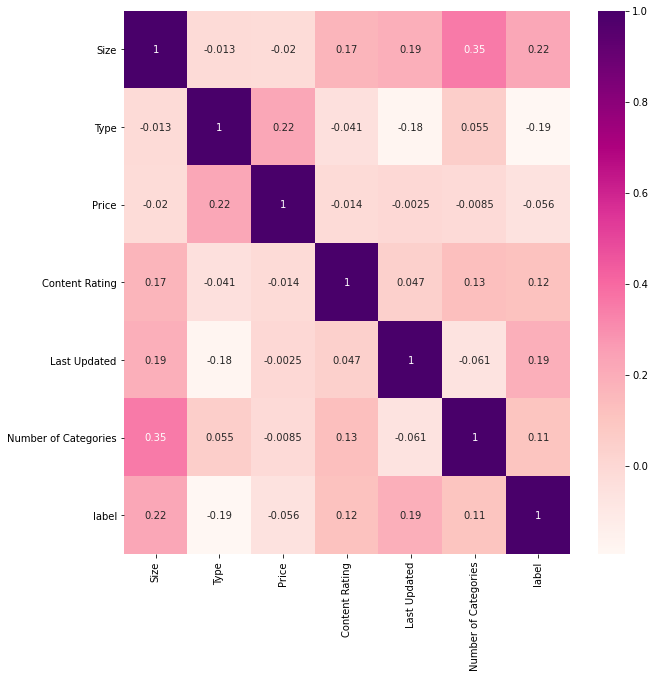

In [55]:
# compute correlation between each pair of variables in data frame
correlations = clean_df.corr()

# plot heat map
plt.figure(figsize=(10,10))
g=sns.heatmap(correlations,annot=True,cmap="RdPu")

As we can see, there is no significant correlation between variables. <br>
The highest correlation between 'label' and other variables is between 'label' and 'Size'.

#### 2. Nominal Categories

We will create 'Category' dummy columns by activating the get_dummies function on the 'Category' column.

In [56]:
clean_df = pd.get_dummies(clean_df, columns=['Category'], drop_first=True)
clean_df.head()

,Size,Type,Price,Content Rating,Last Updated,Number of Categories,label,Category_auto and vehicles,Category_beauty,Category_books and reference,...,Category_personalization,Category_photography,Category_productivity,Category_shopping,Category_social,Category_sports,Category_tools,Category_travel and local,Category_video players,Category_weather
0,19.0,0,0.0,1,1515283200000000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,0,0.0,1,1515974400000000000,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.7,0,0.0,1,1533081600000000000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.0,0,0.0,5,1528416000000000000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.8,0,0.0,1,1529452800000000000,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing the data into train\test and scaling the data

In [57]:
tempdf = clean_df.drop(columns= 'label')
tempdf['label'] = clean_df['label']
X = tempdf.iloc[:, :-1].values # features
Y = tempdf.iloc[:, -1].values # labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Testing the classifier using K-fold cross validation (5 folds)

In [58]:
k_avg_score = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
    k_avg_score[k] = cv_scores.mean()

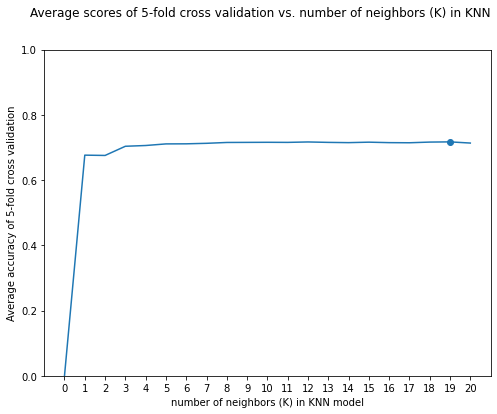

In [59]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score))
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 5-fold cross validation');

In [60]:
print(f"best average accuracy score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")

best average accuracy score is: 0.7172107696802206, for number of neighbors(K) = 19


In [61]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(scaled_X_train, Y_train)

# test the model on the test set
test_score = knn.score(scaled_X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 0.7145077720207254


Our classifier recieves the variables: 'Category', 'Size', 'Type', 'Price', 'Content Rating', 'Last Updated' and 'Number of Categories', and returns the classification of the app - above 75 percentile value (out of our original sample). thus understanding whether the app will probably be successful. <br>
As we can see, our classifier's accuracy score is above 0.7.

# Bonus

In this section, we found an additional dataset which is related to our original dataset. <br>
This dataset contains information about user reviews, including the sentiment of the review (Positive/Negative/Neutral). <br>
We decided to explore further and check if there is a correlation between the sentiment of the review and the rating score of an app. This question intriged us because we wanted to allow companies to relay only on the Rating Score, without the need to conduct a text analysis research on the reviews themseleves. If there will be a correlation, the process of text analysis will be redundant and the compnies will be able to neglect the reviews.<br> 
In order to do so, for each app we will calculate the number of positive sentiments and then we will combine the two datasets (by app name). Then, we will calculate the positive percent of each app (out of the total number of reviews) and plot the result.

In [62]:
df_userreviews = pd.read_csv('user_reviews.csv')
df_userreviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [63]:
df_userreviews.dropna(inplace=True) # dropping NA values

In order to summarize all of the positives we will replace those values with '1' and the rest with '0'.

In [64]:
df_userreviews['Sentiment'] = df_userreviews['Sentiment'].apply(lambda x: x.replace("Positive", "1"))
df_userreviews['Sentiment'] = df_userreviews['Sentiment'].apply(lambda x: x.replace("Neutral", "0"))
df_userreviews['Sentiment'] = df_userreviews['Sentiment'].apply(lambda x: x.replace("Negative", "0"))

In [65]:
df_userreviews['Sentiment'] = pd.to_numeric(df_userreviews['Sentiment'])
sentiment_df = df_userreviews.groupby('App',as_index=False)['Sentiment'].sum() # summerize the number of positives
sentiment_df['number of reviews'] = df_userreviews.groupby('App').size().to_list()

In [66]:
df_googleplaystore = df_googleplaystore.join(sentiment_df.set_index("App"), on="App") # combining between the 2 datasets according to 'App' column

In [67]:
df_googleplaystore.dropna(inplace=True) # dropping NA values

Now we will add a 'Positive Percent' column

In [68]:
df_googleplaystore['Positive Percent'] = df_googleplaystore['Sentiment']/df_googleplaystore['number of reviews'] # calculating the positive percent
df_googleplaystore.head()

Text(0.5, 1.0, 'Positive Reviews Rate vs. Rating Score')

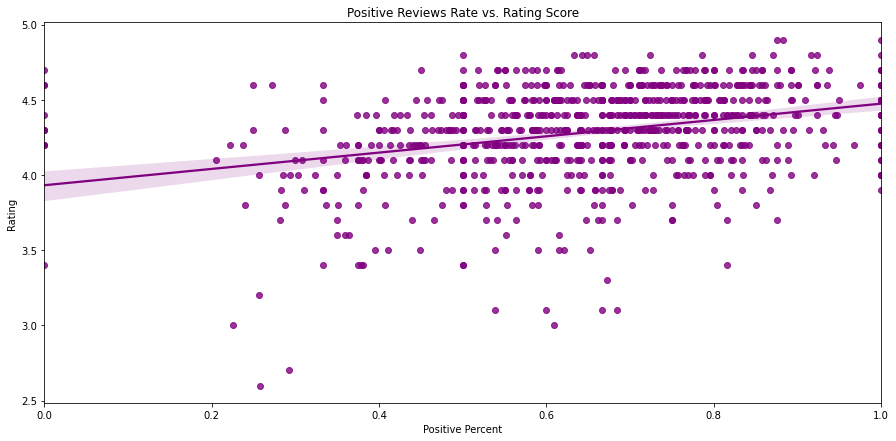

In [70]:
plt.figure(figsize=(15,7))
sns.regplot(x='Positive Percent', y='Rating',color='purple', data=df_googleplaystore)
plt.title("Positive Reviews Rate vs. Rating Score")

As shown, there is a minor positive correlation between the two variables (Positive Reviews Rate and Rating Score).